<a href="https://colab.research.google.com/github/byambaa1982/python_cources_for_beginers/blob/main/titanic_data_analysis/titanic_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Explore

In [4]:
# Check for missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
df.isnull().sum().sum()

866

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Charts

## 1. Bar Chart - Gender Distribution

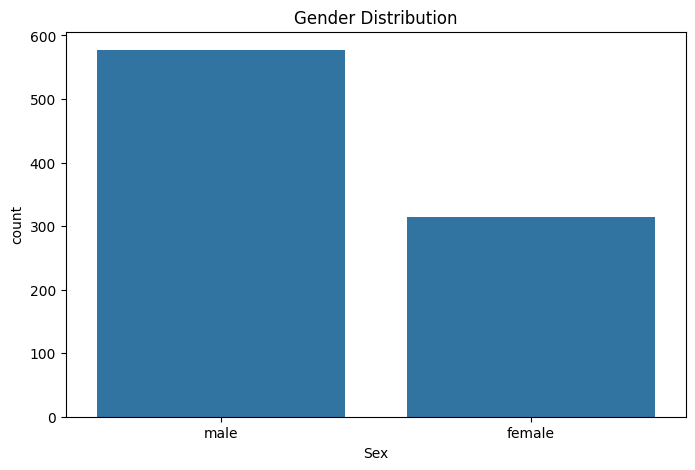

In [10]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

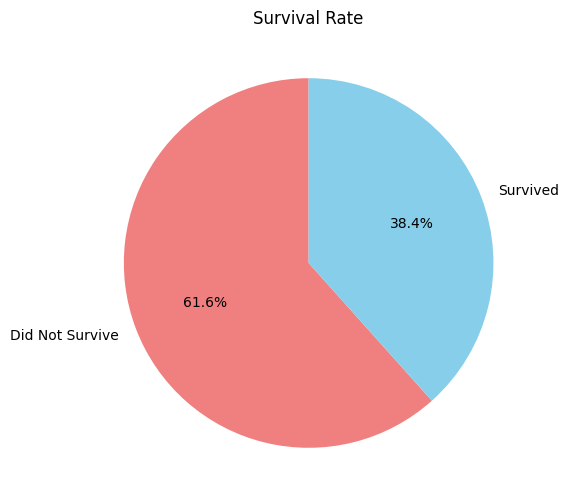

In [11]:
# 2. Pie Chart - Survival Rate
survived_counts = df['Survived'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Survival Rate')
plt.show()

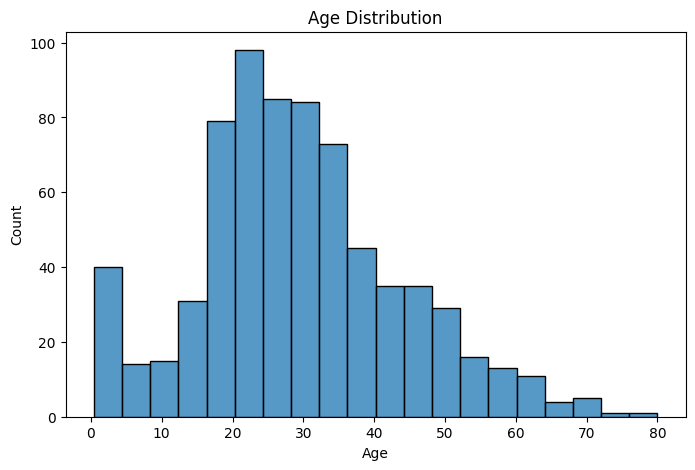

In [12]:
# 3. Histogram - Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), bins=20, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

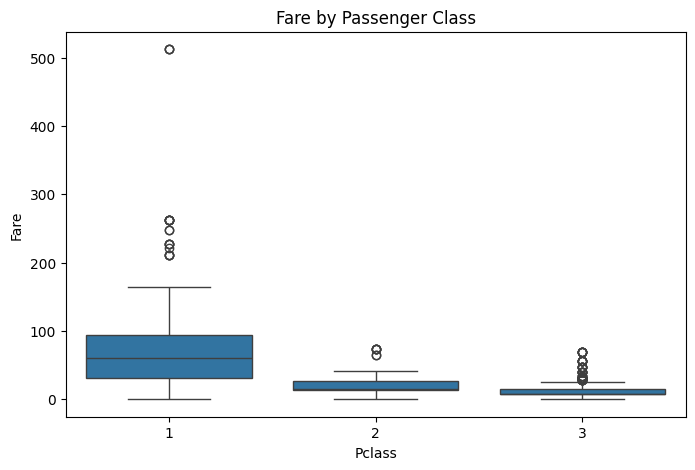

In [13]:
# 4. Box Plot - Fare by Passenger Class
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Passenger Class')
plt.show()

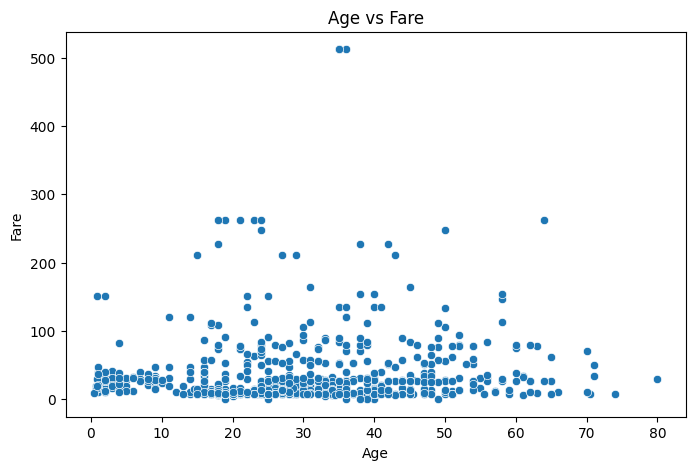

In [14]:
# 5. Scatter Plot - Age vs Fare
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs Fare')
plt.show()

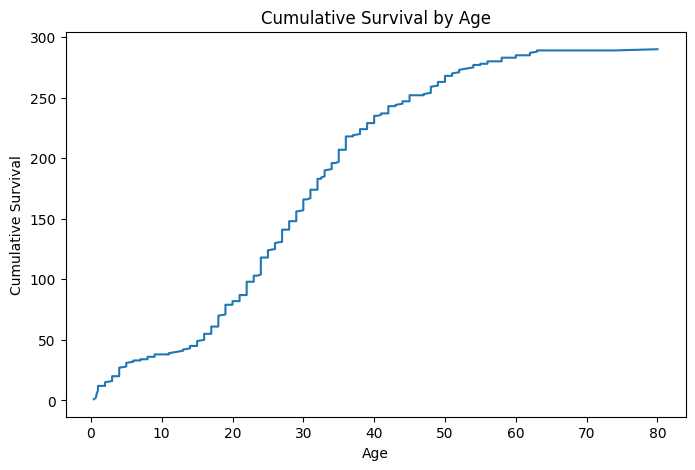

In [15]:
# 6. Line Chart - Cumulative Survival by Age
df_sorted = df[['Age', 'Survived']].sort_values(by='Age').dropna()
df_sorted['Cumulative_Survived'] = df_sorted['Survived'].cumsum()
plt.figure(figsize=(8, 5))
plt.plot(df_sorted['Age'], df_sorted['Cumulative_Survived'])
plt.title('Cumulative Survival by Age')
plt.xlabel('Age')
plt.ylabel('Cumulative Survival')
plt.show()

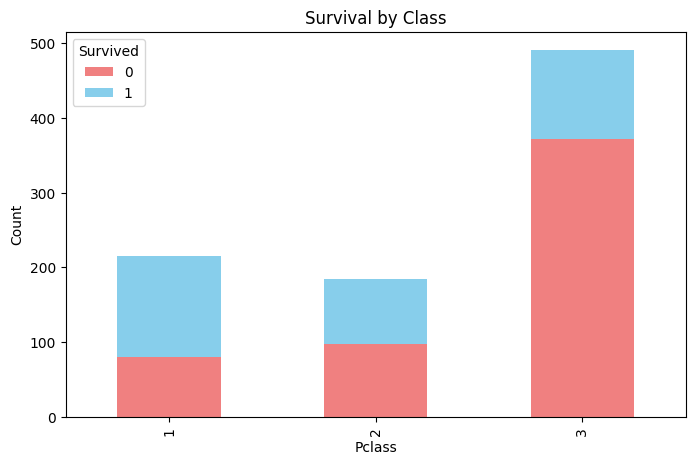

In [16]:
# 7. Stacked Bar Chart - Survival by Class
survived_class = df.groupby(['Pclass', 'Survived']).size().unstack()
survived_class.plot(kind='bar', stacked=True, figsize=(8, 5), color=['lightcoral', 'skyblue'])
plt.title('Survival by Class')
plt.ylabel('Count')
plt.show()

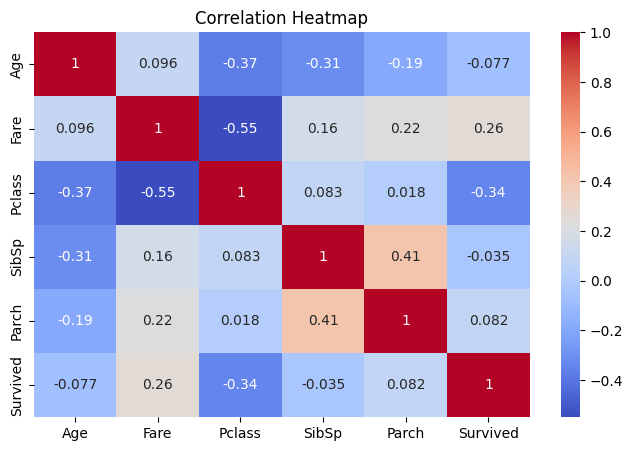

In [17]:
# 8. Heatmap - Correlation Matrix
plt.figure(figsize=(8, 5))
corr_matrix = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

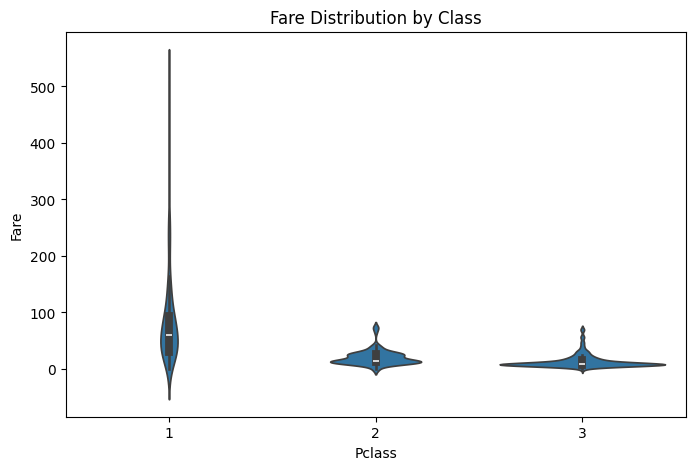

In [18]:
# 9. Violin Plot - Fare Distribution by Class (Advanced)
plt.figure(figsize=(8, 5))
sns.violinplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Class')
plt.show()